# Projeto Renan - Machine Learning II
***

## Importando bibliotecas

In [118]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from scipy.io import arff

# Classes para pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, GridSearchCV
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report,
                             RocCurveDisplay,
                             roc_curve,
                             auc, accuracy_score, precision_score)


import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

In [190]:

d = arff.loadarff("/content/sample_data/indian_pines.arff")
dataset = pd.DataFrame(d[0])


In [213]:
# Distribuição das classes por Features
target_col = 'Class'


4984.368766404199
1011.2105725371708


##Pré-Processamento e Hiperparamentros

### Pré-Processamento dos dados

2.3125275389567564e-14
4.440892098500626e-16


array([[<Axes: title={'center': '140'}>]], dtype=object)

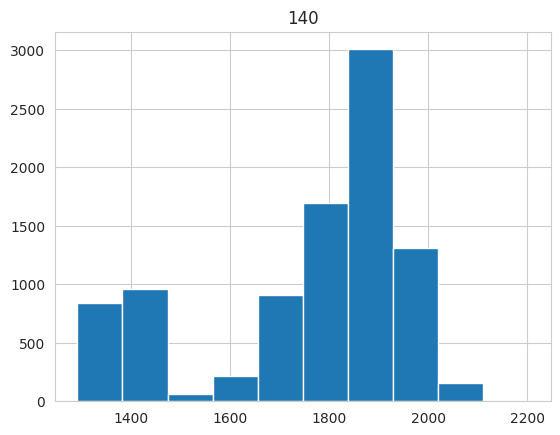

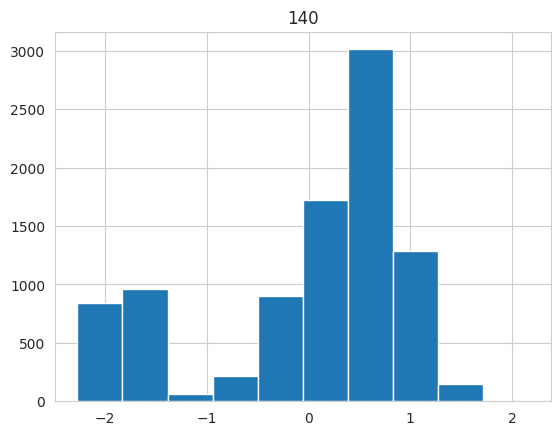

In [226]:
#Arrays do Banco de dados
X = dataset.loc[:,"0":"219"]
y = dataset.loc[:,["Class"]]

#Criando Dataset NORMALIZADO Z
s_dataset = dataset.copy(deep= True)
stdScaler = StandardScaler()
stdScaler.fit(X)
s_dataset.loc[:,"0":"219"] = stdScaler.fit_transform(X,y=True)

#Analisando médias e desvio padrão do dataset não normalizado e normalizado
print (s_dataset.mean().max() - s_dataset.mean().min())
print (s_dataset.std().max() - s_dataset.std().min())

dataset.hist(column="140")
s_dataset.hist(column="140")


###Setup Inicial

In [ ]:
#Refatorando varíaveis de saída
dataset['Class'] = pd.factorize(dataset['Class'])[0]
classArray = ["Alfalfa","Corn","Grass","Hay","Oats","Soybeans","Wheat","Trees"]

#Verificando features
X = dataset.loc[:,"0":"219"]
y = dataset.loc[:,["Class"]]
print(y)
#Gerando objeto kfold
kFoldObj = KFold(n_splits=10,shuffle=True,random_state=199)

      Class
0         0
1         0
2         0
3         0
4         0
...     ...
9139      7
9140      7
9141      7
9142      7
9143      7

[9144 rows x 1 columns]


###Hiperparâmetros e Funções

####Para *KNN*


In [ ]:
#Definindo distância Customizada para KNN
def manhattan_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum()

#Arrays Hiperparametros
ks = [1,5,8,10,13]
distArray = ["euclidean", "manhattan"]

####Para *MLP*

In [ ]:
#Arrays Hiperparamentros

n = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_1 = [1,3,5,15,25,35,45,55]
learningRateInit = [0.0001,0.001,0.01,0.1]
learningRate= ['constant','adaptive']

## Treinamento do modelo

###Treinamento **KNN**

####Treinamento com *Hyper Tunning*

In [ ]:
#KNN com Hypertunning
model = KNeighborsClassifier()
parameters = {'n_neighbors': ks,
                      'metric':distArray}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 10)
def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X, y):

        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

    precision = np.array(precision_list)
    print("\nPrecisão média (desvio): %.3f +- (%.3f)" %(precision.mean(), precision.std()))

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)


Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.86      0.88       243
           2       0.96      1.00      0.98        52
           3       0.98      1.00      0.99        50
           4       0.00      0.00      0.00         1
           5       0.92      0.94      0.93       416
           6       0.96      1.00      0.98        22
           7       1.00      0.98      0.99       128

    accuracy                           0.93       915
   macro avg       0.84      0.81      0.82       915
weighted avg       0.93      0.93      0.93       915

Fold 0: 0.839
Media do modelo  0.8389385394122522

Melhor parametro: {'metric': 'euclidean', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.84      0.79      0.81       266
           2  

###Treinamento **MLP**

####Treinamento Hyper Tunning

In [ ]:
#MLP Hyper

model = MLPClassifier()
train_score = []
val_score = []

parameters = {'hidden_layer_sizes':n,
              'learning_rate': learningRate,
              'learning_rate_init': learningRateInit}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 2)

def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X, y):

        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

    precision = np.array(precision_list)
    print("\nPrecisão média (desvio): %.3f +- (%.3f)" %(precision.mean(), precision.std()))

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)




Melhor parametro: {'hidden_layer_sizes': 90, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00       243
           2       0.44      0.13      0.21        52
           3       0.98      0.82      0.89        50
           4       0.07      1.00      0.12         1
           5       0.63      0.99      0.77       416
           6       0.95      0.82      0.88        22
           7       0.77      1.00      0.87       128

    accuracy                           0.66       915
   macro avg       0.48      0.60      0.47       915
weighted avg       0.49      0.66      0.55       915

Fold 0: 0.478
Media do modelo  0.4777801762832304

Melhor parametro: {'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
              precision    recall  f1-score   support

           0       0.00      0.00  

##Aplicando modelos para todo dataset

In [ ]:
#Aplicando modelo Fold 9, como exeplo, para todo dataset
print(classification_report(y, grid.predict(X)))


              precision    recall  f1-score   support

           0       0.30      0.46      0.36        54
           1       0.64      0.14      0.23      2502
           2       0.64      0.65      0.65       523
           3       0.89      0.86      0.87       489
           4       0.17      0.05      0.08        20
           5       0.64      0.95      0.76      4050
           6       0.94      0.80      0.87       212
           7       0.95      0.95      0.95      1294

    accuracy                           0.70      9144
   macro avg       0.64      0.61      0.60      9144
weighted avg       0.70      0.70      0.64      9144

